In [23]:
#EJERCICIO 7
#Entrena un modelo en Keras que combine capas GRU y convolucionales para predecir los
#valores de cierre de facebook utilizando como entrada únicamente los valores de apertura de
#los datos facebook de los 10 días anteriores y que obtenga unos resultados en test mejores
#que los del apartado anterior.

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import pandas_datareader as web
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense, Conv1D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt

In [25]:
#No me permite hacer webcrapping por lo tante me descargo los datos de internet en un csv para pasarselos
#fb_2 = pd.read_csv('C:\\Users\\ignac\\OneDrive\\Escritorio\\BME\\Master\\CLASES\\Modulo 4\\Redes Convolucionales\\Practica_ignacio_bermejo\\fb.csv', sep=',')
fb_2 = pd.read_csv('fb.csv', sep=',')
print(fb_2)

            Date    Open     High      Low   Close     Volume  OpenInt
0     2012-05-18   42.05   45.000   38.000   38.23  580438450        0
1     2012-05-21   36.53   36.660   33.000   34.03  169418988        0
2     2012-05-22   32.61   33.590   30.940   31.00  101876406        0
3     2012-05-23   31.37   32.500   31.360   32.00   73678512        0
4     2012-05-24   32.95   33.210   31.770   33.03   42560731        0
...          ...     ...      ...      ...     ...        ...      ...
1376  2017-11-06  178.56  180.450  178.310  180.17   13275578        0
1377  2017-11-07  180.50  180.748  179.403  180.25   12903836        0
1378  2017-11-08  179.79  180.350  179.110  179.56   10467606        0
1379  2017-11-09  178.31  179.400  177.090  179.30   12602188        0
1380  2017-11-10  178.35  179.100  177.960  178.46   11060355        0

[1381 rows x 7 columns]


In [26]:
fb_open = fb_2['Open']
fb_close = fb_2['Close']
print(fb_open)

0        42.05
1        36.53
2        32.61
3        31.37
4        32.95
         ...  
1376    178.56
1377    180.50
1378    179.79
1379    178.31
1380    178.35
Name: Open, Length: 1381, dtype: float64


In [27]:
#Ordeno los datos y hago la particion de test y train, usare 1000 para entrenar y el rewsto para validar el modelo
open_2 = fb_open.values[np.arange(0,1000,1)]
close_2 = fb_close.values[np.arange(0,1000,1)]

In [28]:
#Hago grupos de 10 dias 
kk_train = np.reshape(open_2,(100, 10,1))
tt_train = close_2[np.arange(9, 1000, 10)]

In [29]:
#Elijo los 300 siguientres datos de cierre y apertura, y hago grupos de 10 dias
open_2 = fb_open.values[np.arange(1000, 1300, 1)]
close_2 = fb_close.values[np.arange(1000, 1300, 1)]

#reparto en 30 grupos de 10 dias
kk_test = np.reshape(open_2, (30,10,1))
tt_test = close_2[np.arange(9, 100, 10)]

In [30]:
#Creo el modelo
input_shape=kk_train.shape[1:]

model_7 = Sequential()
model_7.add(GRU(32, input_shape=input_shape, activation='relu', return_sequences=True))
model_7.add(Conv1D(48, kernel_size=3, activation="relu", input_shape=input_shape, padding='valid'))
model_7.add(MaxPooling1D()) 
model_7.add(GRU(32, activation='relu')) 
model_7.add(Flatten())
model_7.add(Dense(1))

In [31]:
#Conmpiklo el modelo
model_7.compile(optimizer='adam', loss='mae')

In [32]:
model_7.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 10, 32)            3360      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8, 48)             4656      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4, 48)             0         
_________________________________________________________________
gru_5 (GRU)                  (None, 32)                7872      
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 15,921
Trainable params: 15,921
Non-trainable params: 0
__________________________________________________

In [33]:
#Entreno el modelo
model_7.fit(kk_train, tt_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
4/4 [==============================] - 3s 8ms/step - loss: 61.9760
Epoch 2/10
4/4 [==============================] - 0s 11ms/step - loss: 58.4024
Epoch 3/10
4/4 [==============================] - 0s 11ms/step - loss: 54.2861
Epoch 4/10
4/4 [==============================] - 0s 11ms/step - loss: 49.9050
Epoch 5/10
4/4 [==============================] - 0s 11ms/step - loss: 44.7029
Epoch 6/10
4/4 [==============================] - 0s 11ms/step - loss: 37.6154
Epoch 7/10
4/4 [==============================] - 0s 11ms/step - loss: 26.0693
Epoch 8/10
4/4 [==============================] - 0s 11ms/step - loss: 10.5776
Epoch 9/10
4/4 [==============================] - 0s 11ms/step - loss: 5.1802
Epoch 10/10
4/4 [==============================] - 0s 11ms/step - loss: 4.0952


In [34]:
#Realizo la prediccion
prediccion_2=model_7.predict(kk_test)

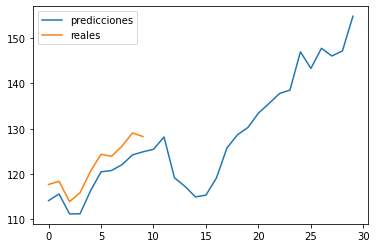

In [35]:
%matplotlib inline
plt.figure()
plt.plot(prediccion_2,label='predicciones')
plt.plot(tt_test,label='reales')
plt.legend()

In [36]:
#Evaluo el modelo
score = model_7.evaluate(kk_train, tt_train, batch_size=128)

score

1/1 [==============================] - 1s 622ms/step - loss: 2.0991


2.099073886871338